<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_Lineal%20/R_Simple/Shared_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)


,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
#Realizamos un conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,17432
Private room,2,8581
Shared room,3,401
Hotel room,1,122


In [4]:
#Realizamos un frame con las variables a utilizar
df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [5]:
df1["room_type_num"].value_counts()

,count
room_type_num,
0,17432
2,8581
3,401
1,122


## División del frame por tipo de habitación

Hotel room/apt no. 1

In [6]:
df_Shared=df1[df1["room_type_num"]== 3]
df_Shared

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...
26227,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


# Filtro de “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

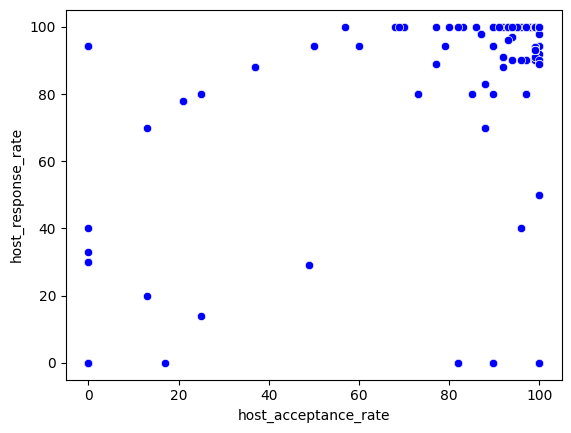

In [7]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='host_response_rate', color="blue", data=df_Shared)

In [8]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Shared[['host_acceptance_rate']]
var_Dep= df_Shared['host_response_rate']

In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [12]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.32200698]),
 'rank_': 1,
 'singular_': array([552.44408932]),
 'intercept_': 61.520133065362295}

**Modelo matemático: Y = 0.32200698x + 61.520133065362295**

---






In [13]:
#Predecimos los valores de host_response_rate a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Shared[['host_acceptance_rate']])
y_pred

array([90.43635982, 80.84055183, 93.72083101, 91.14477518, 92.4328031 ,
       90.43635982, 68.28227963, 93.72083101, 92.11079612, 90.43635982,
       93.39882403, 68.28227963, 61.52013307, 93.39882403, 90.43635982,
       85.02664257, 85.02664257, 90.43635982, 92.75481007, 92.75481007,
       90.43635982, 93.72083101, 61.52013307, 90.43635982, 90.43635982,
       90.43635982, 79.8745309 , 90.43635982, 61.52013307, 84.06062163,
       90.43635982, 61.52013307, 90.43635982, 90.43635982, 90.43635982,
       84.06062163, 93.72083101, 89.2127333 , 93.72083101, 90.43635982,
       90.43635982, 93.39882403, 93.39882403, 93.39882403, 93.39882403,
       93.39882403, 93.72083101, 93.72083101, 93.39882403, 92.11079612,
       93.72083101, 93.39882403, 93.39882403, 93.39882403, 93.39882403,
       93.39882403, 90.43635982, 77.62048204, 90.43635982, 90.43635982,
       90.43635982, 93.72083101, 93.72083101, 93.72083101, 93.72083101,
       90.43635982, 93.72083101, 93.07681705, 90.43635982, 93.72

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df_Shared.insert(0, 'Predict1', y_pred)
df_Shared

,Predict1,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

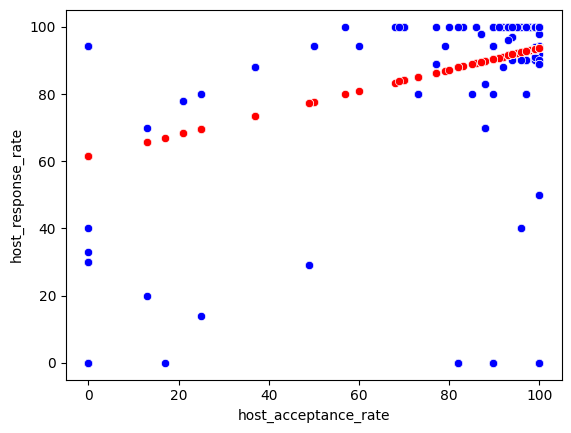

In [15]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=df_Shared)
sns.scatterplot(x='host_acceptance_rate', y='Predict1', color='red', data=df_Shared)


In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.14412264795412

In [17]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.37963488769358383

## Filtro de "“host_acceptance_rate vs price”

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

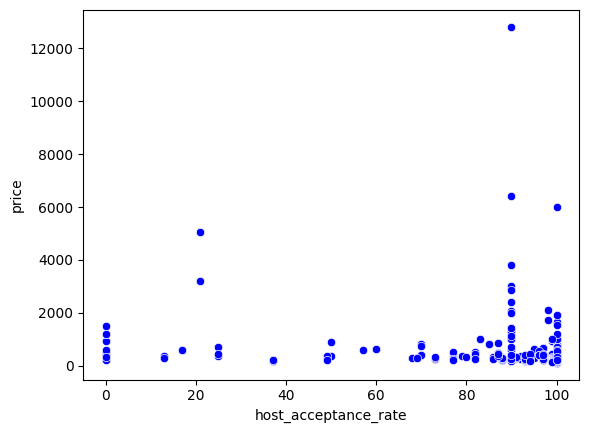

In [18]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='price', color="blue", data=df_Shared)

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Shared[['host_acceptance_rate']]
var_Dep= df_Shared['price']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [21]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [23]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.83312985]),
 'rank_': 1,
 'singular_': array([552.44408932]),
 'intercept_': 461.35535973435896}

**Modelo matemático: Y = 0.83312985x + 461.35535973435896**

In [24]:
#Predecimos los valores de price a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Shared[['host_acceptance_rate']])
y_pred

array([536.17042024, 511.34315072, 544.6683447 , 538.00330591,
       541.33582531, 536.17042024, 478.85108658, 544.6683447 ,
       540.50269546, 536.17042024, 543.83521486, 478.85108658,
       461.35535973, 543.83521486, 536.17042024, 522.17383876,
       522.17383876, 536.17042024, 542.16895516, 542.16895516,
       536.17042024, 544.6683447 , 461.35535973, 536.17042024,
       536.17042024, 536.17042024, 508.84376117, 536.17042024,
       461.35535973, 519.67444921, 536.17042024, 461.35535973,
       536.17042024, 536.17042024, 536.17042024, 519.67444921,
       544.6683447 , 533.00452681, 544.6683447 , 536.17042024,
       536.17042024, 543.83521486, 543.83521486, 543.83521486,
       543.83521486, 543.83521486, 544.6683447 , 544.6683447 ,
       543.83521486, 540.50269546, 544.6683447 , 543.83521486,
       543.83521486, 543.83521486, 543.83521486, 543.83521486,
       536.17042024, 503.01185222, 536.17042024, 536.17042024,
       536.17042024, 544.6683447 , 544.6683447 , 544.66

In [25]:
#Insertamos la columna de predicciones en el DataFrame
df_Shared.insert(1, 'Predict2', y_pred)
df_Shared

,Predict1,Predict2,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

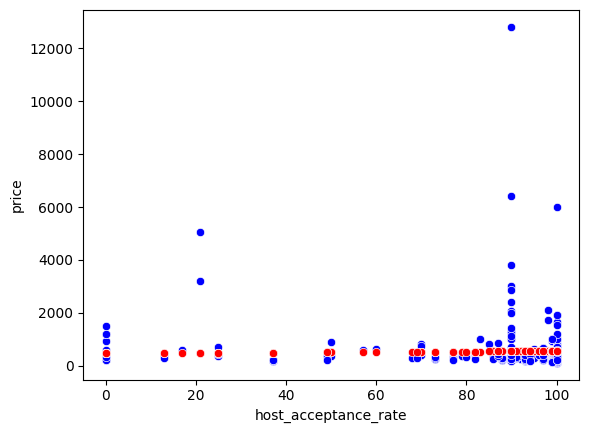

In [26]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=df_Shared)
sns.scatterplot(x='host_acceptance_rate', y='Predict2', color='red', data=df_Shared)


In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.0006610143809677727

In [28]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.025710199940252754

## Filtro para “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

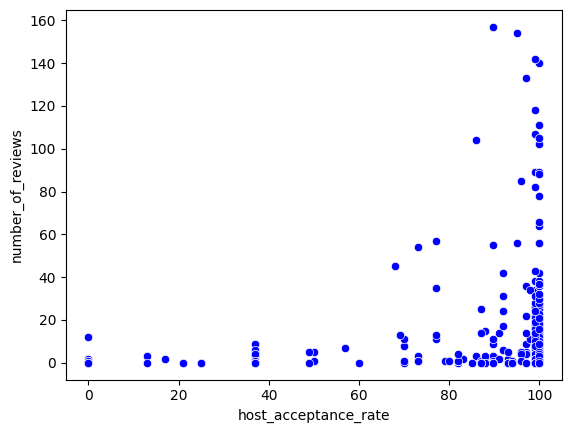

In [29]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='number_of_reviews', color="blue", data=df_Shared)

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Shared[['host_acceptance_rate']]
var_Dep= df_Shared['number_of_reviews']

In [31]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [34]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19132633]),
 'rank_': 1,
 'singular_': array([552.44408932]),
 'intercept_': -4.393165578594923}

**Modelo matemático: y = 0.19132633x -4.393165578594923**

In [35]:
#Predecimos los valores de number_of_reviews a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Shared[['host_acceptance_rate']])
y_pred

array([12.78793927,  7.0864145 , 14.73946789, 13.20885721, 13.97416255,
       12.78793927, -0.37531255, 14.73946789, 13.78283621, 12.78793927,
       14.54814155, -0.37531255, -4.39316558, 14.54814155, 12.78793927,
        9.57365685,  9.57365685, 12.78793927, 14.16548888, 14.16548888,
       12.78793927, 14.73946789, -4.39316558, 12.78793927, 12.78793927,
       12.78793927,  6.5124355 , 12.78793927, -4.39316558,  8.99967785,
       12.78793927, -4.39316558, 12.78793927, 12.78793927, 12.78793927,
        8.99967785, 14.73946789, 12.0608992 , 14.73946789, 12.78793927,
       12.78793927, 14.54814155, 14.54814155, 14.54814155, 14.54814155,
       14.54814155, 14.73946789, 14.73946789, 14.54814155, 13.78283621,
       14.73946789, 14.54814155, 14.54814155, 14.54814155, 14.54814155,
       14.54814155, 12.78793927,  5.17315115, 12.78793927, 12.78793927,
       12.78793927, 14.73946789, 14.73946789, 14.73946789, 14.73946789,
       12.78793927, 14.73946789, 14.35681522, 12.78793927, 14.73

In [36]:
#Insertamos la columna de predicciones en el DataFrame
df_Shared.insert(2, 'Predict3', y_pred)
df_Shared

,Predict1,Predict2,Predict3,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,12.787939,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,7.086415,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,14.739468,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,13.208857,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,13.974163,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,13.591510,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,10.912941,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,14.739468,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,14.739468,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

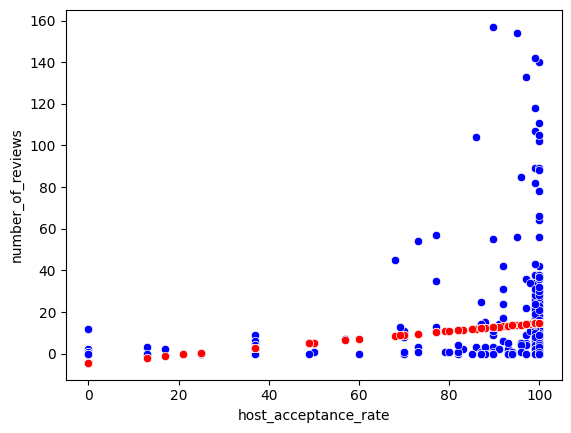

In [37]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=df_Shared)
sns.scatterplot(x='host_acceptance_rate', y='Predict3', color='red', data=df_Shared)

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.046074064121143676

In [39]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.21464869932320502

# Filtro de "“review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

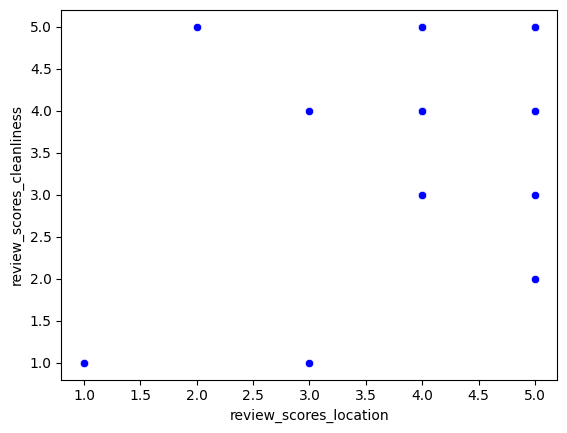

In [40]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'review_scores_location', y='review_scores_cleanliness', color="blue", data=df_Shared)

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Shared[['review_scores_location']]
var_Dep= df_Shared['review_scores_cleanliness']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [43]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.78805131]),
 'rank_': 1,
 'singular_': array([8.31907342]),
 'intercept_': 0.9194292303257421}

**Modelo matemático: Y = 0.78805131x + 0.9194292303257421**

In [46]:
#Predecimos los valores de review_scores_cleanliness a partir de la variable review_scores_location
y_pred= model.predict(X=df_Shared[['review_scores_location']])
y_pred

array([4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 3.28358317, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.07163448, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.07163448, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.07163448, 4.85968579, 4.07163448, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.07163448, 4.85968579, 4.85968579,
       4.85968579, 4.85968579, 4.85968579, 4.07163448, 4.85968

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df_Shared.insert(3, 'Predict4', y_pred)
df_Shared

,Predict1,Predict2,Predict3,Predict4,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,12.787939,4.859686,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,7.086415,4.859686,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,14.739468,4.859686,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,13.208857,4.859686,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,13.974163,4.859686,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,13.591510,4.859686,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,10.912941,4.859686,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,14.739468,4.859686,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,14.739468,4.859686,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

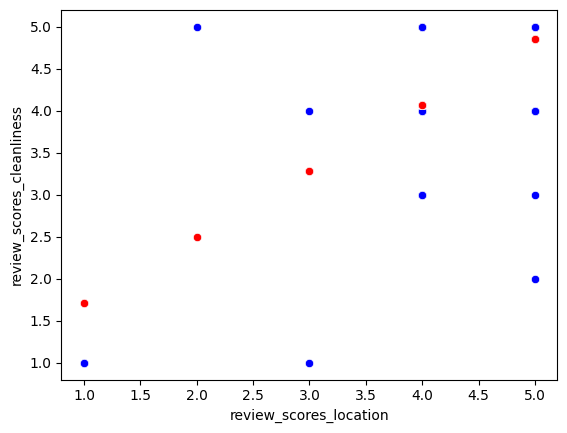

In [48]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=df_Shared)
sns.scatterplot(x='review_scores_location', y='Predict4', color='red', data=df_Shared)


In [49]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.36384652476498347

In [50]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.6031969203875162

# Filtro para “availability_365 vs number_of_reviews”

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

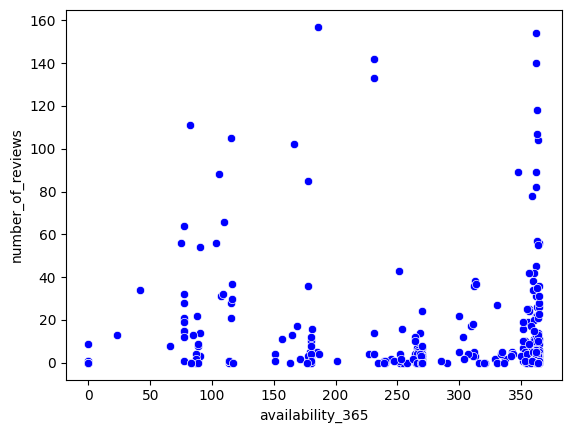

In [51]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'availability_365', y='number_of_reviews', color="blue", data=df_Shared)

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Shared[['availability_365']]
var_Dep= df_Shared['number_of_reviews']

In [53]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [54]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [55]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [56]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00336718]),
 'rank_': 1,
 'singular_': array([2270.36230644]),
 'intercept_': 12.125674338782432}

**Modelo matemático: Y = -0.00336718x +  12.125674338782432**

In [57]:
#Predecimos los valores de number_of_reviews a partir de la variable availability_365
y_pred= model.predict(X=df_Shared[['availability_365']])
y_pred

array([12.12567434, 11.14919321, 11.5195826 , 10.90675651, 11.52631695,
       10.90002216, 10.89665498, 10.90675651, 10.90675651, 10.89665498,
       11.57009025, 10.90002216, 11.82599565, 11.55662154, 12.12567434,
       11.82262847, 11.82262847, 12.12567434, 10.90338934, 11.52631695,
       12.12567434, 11.51621543, 10.89665498, 12.12567434, 12.12567434,
       12.12567434, 10.90338934, 12.12567434, 11.5195826 , 10.90338934,
       10.89665498, 11.52631695, 12.12567434, 10.89665498, 12.12567434,
       10.89665498, 12.04822928, 10.90002216, 10.90002216, 12.12567434,
       10.89665498, 10.90675651, 10.90675651, 10.90675651, 10.90338934,
       10.91349087, 11.11552144, 11.21653673, 10.90338934, 10.89665498,
       11.56672307, 10.90338934, 10.90338934, 11.34785661, 11.50274672,
       10.91349087, 12.12567434, 11.52294978, 12.12567434, 12.12567434,
       12.12567434, 11.52631695, 10.92695957, 11.11552144, 10.89665498,
       11.8461987 , 10.92359239, 11.59702766, 12.12567434, 10.89

In [58]:
#Insertamos la columna de predicciones en el DataFrame
df_Shared.insert(4, 'Predict5', y_pred)
df_Shared

,Predict1,Predict2,Predict3,Predict4,Predict5,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,12.787939,4.859686,12.125674,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,7.086415,4.859686,11.149193,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,14.739468,4.859686,11.519583,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,13.208857,4.859686,10.906757,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,13.974163,4.859686,11.526317,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,13.591510,4.859686,11.216537,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,10.912941,4.859686,10.937061,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,14.739468,4.859686,10.903389,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,14.739468,4.859686,10.916858,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

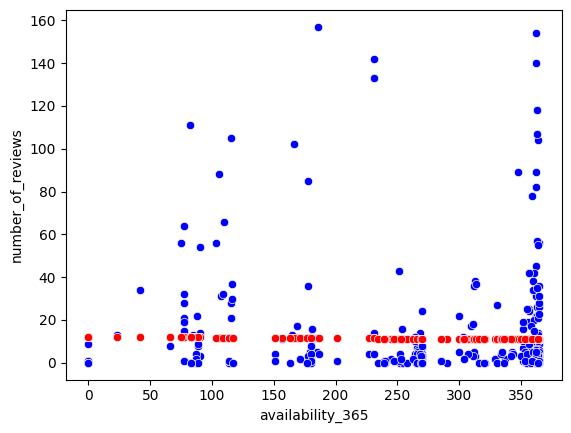

In [59]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=df_Shared)
sns.scatterplot(x='availability_365', y='Predict5', color='red', data=df_Shared)

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.0002410196258190167

In [61]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.015524806788460096

# Filtro para “reviews_per_month vs review_scores_communication”

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

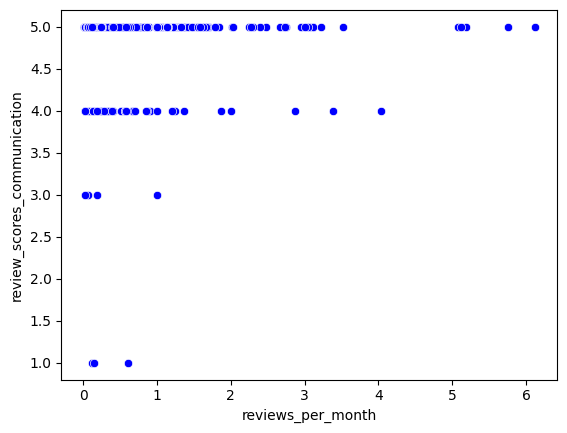

In [62]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'reviews_per_month', y='review_scores_communication', color="blue", data=df_Shared)

In [63]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Shared[['reviews_per_month']]
var_Dep= df_Shared['review_scores_communication']

In [64]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [65]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [66]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [67]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.07453379]),
 'rank_': 1,
 'singular_': array([16.71974451]),
 'intercept_': 4.778777017905569}

**Modelo matemático: Y = 0.07453379x + 4.778777017905569**

In [68]:
#Predecimos los valores de review_scores_communication a partir de la variable reviews_per_month
y_pred= model.predict(X=df_Shared[['reviews_per_month']])
y_pred

array([4.8630002 , 4.8630002 , 4.7862304 , 4.79964648, 4.83616804,
       4.8630002 , 4.8630002 , 4.87492561, 4.90175777, 4.8630002 ,
       4.78995709, 4.8630002 , 4.78026769, 4.79368378, 4.8630002 ,
       4.82200662, 4.78101303, 4.8630002 , 4.80709986, 4.81231722,
       4.8630002 , 4.79368378, 4.77952236, 4.8630002 , 4.77952236,
       4.8630002 , 4.78548506, 4.8630002 , 4.78995709, 4.78697573,
       4.8630002 , 4.77952236, 4.8630002 , 4.8630002 , 4.8630002 ,
       4.79070242, 4.90548446, 4.89579507, 4.78772107, 4.78921175,
       4.8630002 , 4.80411851, 4.87343493, 4.88163365, 4.91591919,
       4.81827993, 4.80113715, 4.79741047, 4.90473912, 4.84511209,
       4.90101243, 4.81008121, 4.80486384, 4.96362082, 4.79293844,
       4.82796932, 4.8630002 , 4.78473972, 4.8630002 , 4.8630002 ,
       4.8630002 , 4.8630002 , 4.80411851, 4.8078452 , 4.81306256,
       4.8630002 , 4.81306256, 4.80635452, 4.8630002 , 4.82945999,
       4.7862304 , 4.99268899, 4.78548506, 4.81678925, 4.86300

In [69]:
#Insertamos la columna de predicciones en el DataFrame
df_Shared.insert(5, 'Predict6', y_pred)
df_Shared

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,12.787939,4.859686,12.125674,4.863000,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,7.086415,4.859686,11.149193,4.863000,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,14.739468,4.859686,11.519583,4.786230,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,13.208857,4.859686,10.906757,4.799646,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,13.974163,4.859686,11.526317,4.836168,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,13.591510,4.859686,11.216537,4.863000,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,10.912941,4.859686,10.937061,4.853311,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,14.739468,4.859686,10.903389,4.863000,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,14.739468,4.859686,10.916858,4.853311,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

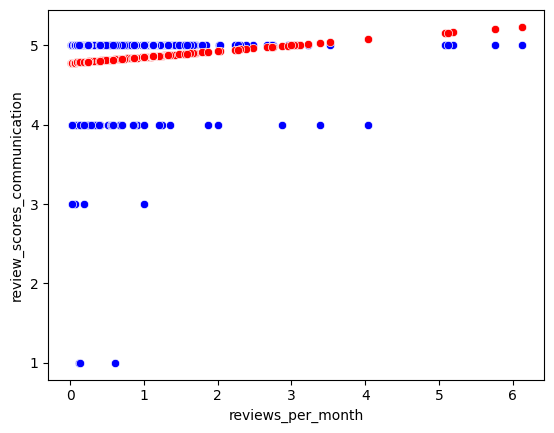

In [70]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=df_Shared)
sns.scatterplot(x='reviews_per_month', y='Predict6', color='red', data=df_Shared)

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.016343289951090023

In [72]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.1278408774652694

## Creación del modelo matemático


In [73]:
# Modelo usando las regresiones lineales
dfModel = df_Shared[df_Shared["room_type_num"] == 3]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,12.787939,4.859686,12.125674,4.863000,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,7.086415,4.859686,11.149193,4.863000,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,14.739468,4.859686,11.519583,4.786230,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,13.208857,4.859686,10.906757,4.799646,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,13.974163,4.859686,11.526317,4.836168,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,13.591510,4.859686,11.216537,4.863000,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,10.912941,4.859686,10.937061,4.853311,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,14.739468,4.859686,10.903389,4.863000,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,14.739468,4.859686,10.916858,4.853311,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


In [74]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel



,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.758485
reviews_per_month,0.473377
Predict6,0.473377
Predict2,0.214649
Predict1,0.214649
Predict3,0.214649
host_acceptance_rate,0.214649


<Axes: >

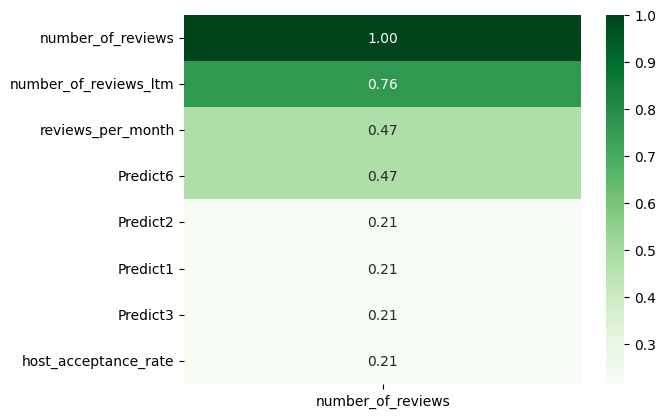

In [75]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map1

In [76]:
# Modelo original
df = df[df["room_type_num"] == 3]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
104,3059169,2012,94.3,89.8,0.0,1,1,0,19.446140,-99.158680,...,0,0.0,1.13,991.0,1.0,5.0,4,3,5,1
255,16186468,2014,94.3,60.0,0.0,3,1,1,19.407643,-99.173932,...,290,0.0,1.13,640.0,2.0,9.0,4,3,5,1
353,27291692,2015,94.3,100.0,0.0,1,1,1,19.329440,-99.160910,...,180,10.0,0.10,275.0,3.0,61.0,2,3,5,3
376,28190065,2015,100.0,92.0,1.0,2,1,1,19.438830,-99.152830,...,362,31.0,0.28,275.0,2.0,20.0,4,1,5,1
452,31426842,2015,100.0,96.0,1.0,2,1,1,19.443290,-99.109470,...,178,85.0,0.77,550.0,2.0,16.0,13,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,438265201,2021,90.0,94.0,0.0,15,1,1,19.406896,-99.175719,...,270,0.0,1.13,188.0,6.0,4.0,4,3,5,1
26294,541899248,2023,100.0,80.0,0.0,1,1,1,19.397400,-99.100020,...,353,1.0,1.00,311.0,1.0,7.0,6,3,5,0
26351,101241711,2016,100.0,100.0,0.0,3,1,1,19.393006,-99.153420,...,363,0.0,1.13,210.0,6.0,23.0,1,3,5,2
26405,92679034,2016,98.0,100.0,1.0,6,1,1,19.422517,-99.173349,...,359,1.0,1.00,320.0,1.0,4.0,4,3,5,1


In [77]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.758485
reviews_per_month,0.473377
number_of_reviews_l30d,0.473313
maximum_nights_avg_ntm,0.276936
host_acceptance_rate,0.214649


<Axes: >

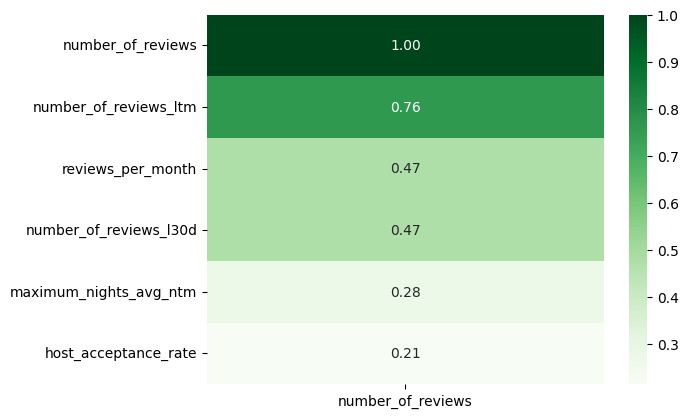

In [78]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

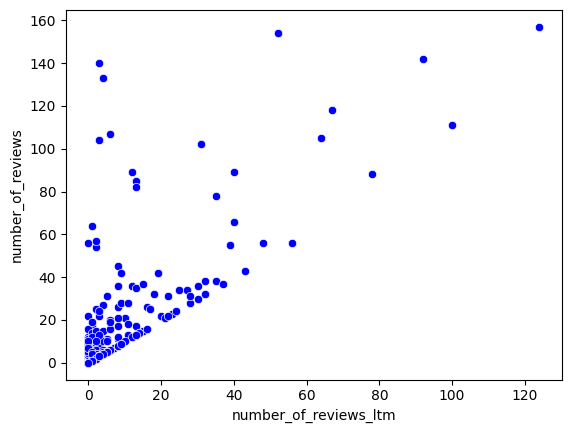

In [79]:
# Para "Shared Room"
# el mejor modelo matemático simple que describe de mejor manera el número de reseñas es:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_Shared)

In [80]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df_Shared[["number_of_reviews_ltm"]]
Var_Dep = df_Shared[["number_of_reviews"]]

In [81]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.38183489]]),
 'rank_': 1,
 'singular_': array([270.2872952]),
 'intercept_': array([3.86597301])}

**Modelo matemático: Y = 1.38183489x + 3.86597301**

In [82]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = df_Shared[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
df_Shared.insert(6, 'PredictFinal', y_pred)
df_Shared

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,PredictFinal,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
104,90.436360,536.170420,12.787939,4.859686,12.125674,4.863000,3.865973,3,89.8,94.3,5.0,5.0,991.0,0,0.0,1.13,5.0,0
255,80.840552,511.343151,7.086415,4.859686,11.149193,4.863000,3.865973,3,60.0,94.3,5.0,5.0,640.0,290,0.0,1.13,5.0,0
353,93.720831,544.668345,14.739468,4.859686,11.519583,4.786230,5.247808,3,100.0,94.3,5.0,5.0,275.0,180,10.0,0.10,5.0,1
376,91.144775,538.003306,13.208857,4.859686,10.906757,4.799646,10.775147,3,92.0,100.0,5.0,5.0,275.0,362,31.0,0.28,5.0,5
452,92.432803,541.335825,13.974163,4.859686,11.526317,4.836168,21.829827,3,96.0,100.0,5.0,5.0,550.0,178,85.0,0.77,5.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,91.788789,539.669566,13.591510,4.859686,11.216537,4.863000,3.865973,3,94.0,90.0,5.0,5.0,188.0,270,0.0,1.13,5.0,0
26294,87.280691,528.005748,10.912941,4.859686,10.937061,4.853311,5.247808,3,80.0,100.0,5.0,5.0,311.0,353,1.0,1.00,5.0,1
26351,93.720831,544.668345,14.739468,4.859686,10.903389,4.863000,3.865973,3,100.0,100.0,5.0,5.0,210.0,363,0.0,1.13,5.0,0
26405,93.720831,544.668345,14.739468,4.859686,10.916858,4.853311,5.247808,3,100.0,98.0,5.0,5.0,320.0,359,1.0,1.00,5.0,1


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

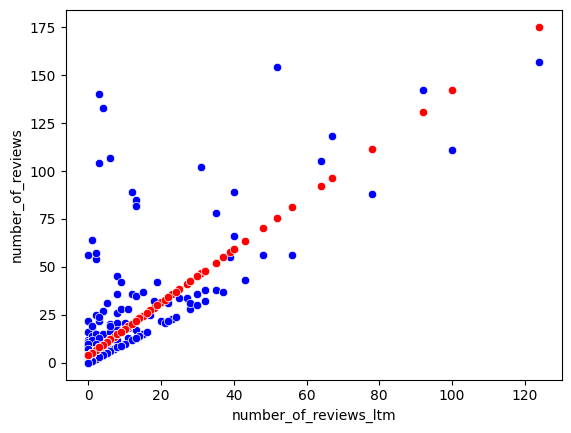

In [83]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_Shared)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = df_Shared)

In [84]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7584849425505192